In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/BigData/olist/output/propensao_revenda_abt1.csv")

In [ ]:
df.shape

(11627, 9)

In [ ]:
df.head()

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,nao_revendeu_next_6m
0,2018-01-01,0015a82c2db000af6aaaf3ae2ecb0532,SP,3,3,1,2685.00,74,1
1,2018-01-01,001cca7ae9ae17fb1caed9dfb1094831,ES,171,207,9,21275.23,2,0
2,2018-01-01,002100f778ceb8431b7a1020ff7ab48f,SP,38,42,15,781.80,2,0
3,2018-01-01,003554e2dce176b5555353e4f3555ac8,GO,1,1,1,120.00,16,1
4,2018-01-01,004c9cd9d87a3c30c522c48c4fc07416,SP,130,141,75,16228.88,8,0


In [ ]:
df_train= df.query("data_ref_safra < '2018-03-01'")
df_oot= df.query("data_ref_safra == '2018-03-01'")

In [ ]:
key_vars= ["data_ref_safra","seller_id"]
cat_vars= ["uf"]
num_vars= ["tot_orders_12m",	"tot_items_12m",	"tot_items_dist_12m",	"receita_12m",	"recencia"]

target="nao_revendeu_next_6m"

features= cat_vars+num_vars

In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 13.9 MB

In [ ]:
from pycaret.classification import *

In [ ]:
exp_setup = setup(data=df_train, test_data=df_oot,target=target,ignore_features=key_vars,categorical_features=cat_vars,
                  numeric_features=num_vars,session_id=42)



,Description,Value
0,Session id,42
1,Target,nao_revendeu_next_6m
2,Target type,Binary
3,Original data shape,"(5369, 9)"
4,Transformed data shape,"(5369, 28)"
5,Transformed train set shape,"(3495, 28)"
6,Transformed test set shape,"(1874, 28)"
7,Ignore features,2
8,Numeric features,5
9,Categorical features,1


In [ ]:
help(get_config)

Help on function get_config in module pycaret.classification.functional:

get_config(variable: Optional[str] = None)
    This function is used to access global environment variables.
    
    Example
    -------
    >>> X_train = get_config('X_train')
    
    This will return training features.
    
    
    variable : str, default = None
        Name of the variable to return the value of. If None,
        will return a list of possible names.
    
    
    Returns
    -------
    variable



In [ ]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
get_config("X_train_transformed")

,uf_SP,uf_ES,uf_GO,uf_PR,uf_MG,uf_RN,uf_SC,uf_RJ,uf_RS,uf_PB,...,uf_SE,uf_MS,uf_PA,uf_MA,uf_PI,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,2685.000000,74.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,171.0,207.0,9.0,21275.230469,2.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,38.0,42.0,15.0,781.799988,2.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,120.000000,16.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,130.0,141.0,75.0,16228.879883,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3490,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,10.0,5.0,9976.799805,2.0
3491,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,84.800003,27.0
3492,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,9.0,7.0,1254.099976,65.0
3493,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,10.0,2.0,1359.900024,2.0


In [ ]:
get_config("pipeline")

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['tot_orders_12m', 'tot_items_12m',
                                             'tot_items_dist_12m',
                                             'receita_12m', 'recencia'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated...
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('onehot_encoding',
                 TransformerWrapper(exclude=None, include=['uf'],
                                    transformer=OneHotEncoder(cols=['uf'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0)))],
         verbose=False)

In [ ]:
print(get_config("pipeline"))

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['tot_orders_12m', 'tot_items_12m',
                                             'tot_items_dist_12m',
                                             'receita_12m', 'recencia'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated...
                                                              copy=True,

In [ ]:
compare_models(fold=5,sort="auc")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8492,0.9219,0.7748,0.8198,0.7964,0.6769,0.6778,0.5080
et,Extra Trees Classifier,0.8561,0.9208,0.7786,0.8330,0.8049,0.6911,0.6921,0.8540
xgboost,Extreme Gradient Boosting,0.8452,0.9187,0.7808,0.8066,0.7933,0.6697,0.6701,0.3660
catboost,CatBoost Classifier,0.8464,0.9180,0.7823,0.8089,0.7951,0.6723,0.6728,7.2300
lightgbm,Light Gradient Boosting Machine,0.8466,0.9159,0.7876,0.8059,0.7965,0.6735,0.6737,0.8340
gbc,Gradient Boosting Classifier,0.8352,0.9128,0.7681,0.7936,0.7803,0.6485,0.6491,0.5940
lda,Linear Discriminant Analysis,0.8103,0.8979,0.5803,0.8816,0.6997,0.5696,0.5963,0.1760
ada,Ada Boost Classifier,0.8223,0.8974,0.7425,0.7821,0.7611,0.6199,0.6212,0.2600
lr,Logistic Regression,0.8235,0.8973,0.6517,0.8503,0.7377,0.6081,0.6205,3.0480
nb,Naive Bayes,0.5525,0.8662,0.9474,0.4582,0.6176,0.2132,0.3049,0.3320


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [ ]:
resultados_dos_modelos= pull()

In [ ]:
resultados_dos_modelos

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8492,0.9219,0.7748,0.8198,0.7964,0.6769,0.6778,0.508
et,Extra Trees Classifier,0.8561,0.9208,0.7786,0.8330,0.8049,0.6911,0.6921,0.854
xgboost,Extreme Gradient Boosting,0.8452,0.9187,0.7808,0.8066,0.7933,0.6697,0.6701,0.366
catboost,CatBoost Classifier,0.8464,0.9180,0.7823,0.8089,0.7951,0.6723,0.6728,7.230
lightgbm,Light Gradient Boosting Machine,0.8466,0.9159,0.7876,0.8059,0.7965,0.6735,0.6737,0.834
gbc,Gradient Boosting Classifier,0.8352,0.9128,0.7681,0.7936,0.7803,0.6485,0.6491,0.594
lda,Linear Discriminant Analysis,0.8103,0.8979,0.5803,0.8816,0.6997,0.5696,0.5963,0.176
ada,Ada Boost Classifier,0.8223,0.8974,0.7425,0.7821,0.7611,0.6199,0.6212,0.260
lr,Logistic Regression,0.8235,0.8973,0.6517,0.8503,0.7377,0.6081,0.6205,3.048
nb,Naive Bayes,0.5525,0.8662,0.9474,0.4582,0.6176,0.2132,0.3049,0.332


In [ ]:
resultados_dos_modelos.to_csv()

',Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)\nrf,Random Forest Classifier,0.8492,0.9219,0.7748,0.8198,0.7964,0.6769,0.6778,0.508\net,Extra Trees Classifier,0.8561,0.9208,0.7786,0.833,0.8049,0.6911,0.6921,0.854\nxgboost,Extreme Gradient Boosting,0.8452,0.9187,0.7808,0.8066,0.7933,0.6697,0.6701,0.366\ncatboost,CatBoost Classifier,0.8464,0.918,0.7823,0.8089,0.7951,0.6723,0.6728,7.23\nlightgbm,Light Gradient Boosting Machine,0.8466,0.9159,0.7876,0.8059,0.7965,0.6735,0.6737,0.834\ngbc,Gradient Boosting Classifier,0.8352,0.9128,0.7681,0.7936,0.7803,0.6485,0.6491,0.594\nlda,Linear Discriminant Analysis,0.8103,0.8979,0.5803,0.8816,0.6997,0.5696,0.5963,0.176\nada,Ada Boost Classifier,0.8223,0.8974,0.7425,0.7821,0.7611,0.6199,0.6212,0.26\nlr,Logistic Regression,0.8235,0.8973,0.6517,0.8503,0.7377,0.6081,0.6205,3.048\nnb,Naive Bayes,0.5525,0.8662,0.9474,0.4582,0.6176,0.2132,0.3049,0.332\nknn,K Neighbors Classifier,0.8109,0.8639,0.696,0.7842,0.7373,0.5904,0.5931,0.49\ndt,Decision Tree Cl

In [ ]:
rf= create_model("rf", fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8526,0.9271,0.7566,0.8417,0.7968,0.6818,0.6841
1,0.8240,0.9102,0.7341,0.7903,0.7612,0.6222,0.6232
2,0.8512,0.9173,0.7707,0.8266,0.7977,0.6802,0.6813
3,0.8498,0.9248,0.7857,0.8132,0.7992,0.6793,0.6795
4,0.8684,0.9298,0.8271,0.8271,0.8271,0.7208,0.7208
Mean,0.8492,0.9219,0.7748,0.8198,0.7964,0.6769,0.6778
Std,0.0143,0.0072,0.0312,0.0173,0.0209,0.0315,0.0313


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
et= create_model("et", fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8455,0.9277,0.7640,0.8193,0.7907,0.6685,0.6695
1,0.8340,0.9214,0.7528,0.8008,0.7761,0.6444,0.6452
2,0.8627,0.9101,0.7820,0.8455,0.8125,0.7044,0.7057
3,0.8584,0.9172,0.7857,0.8327,0.8085,0.6963,0.6970
4,0.8798,0.9277,0.8083,0.8669,0.8366,0.7417,0.7429
Mean,0.8561,0.9208,0.7786,0.8330,0.8049,0.6911,0.6921
Std,0.0156,0.0067,0.0191,0.0225,0.0205,0.0330,0.0332


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
xgboost= create_model("xgboost", fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8412,0.9162,0.7528,0.8171,0.7836,0.6585,0.6599
1,0.8155,0.9057,0.7341,0.7717,0.7524,0.6055,0.6059
2,0.8441,0.9130,0.7744,0.8078,0.7908,0.6666,0.6670
3,0.8555,0.9261,0.8045,0.8137,0.8091,0.6929,0.6929
4,0.8698,0.9325,0.8383,0.8229,0.8305,0.7249,0.7249
Mean,0.8452,0.9187,0.7808,0.8066,0.7933,0.6697,0.6701
Std,0.0180,0.0095,0.0371,0.0182,0.0261,0.0396,0.0394


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
rf_tunerd = tune_model(rf,fold=5, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8255,0.9123,0.7378,0.7912,0.7636,0.6255,0.6265
1,0.8183,0.8928,0.7678,0.7593,0.7635,0.6160,0.6160
2,0.8612,0.9092,0.7820,0.8421,0.8109,0.7015,0.7028
3,0.8426,0.9164,0.7970,0.7910,0.7940,0.6667,0.6667
4,0.8298,0.9099,0.7820,0.7732,0.7776,0.6397,0.6397
Mean,0.8355,0.9081,0.7733,0.7914,0.7819,0.6499,0.6503
Std,0.0151,0.0080,0.0200,0.0281,0.0183,0.0310,0.0312


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
et_tunerd = tune_model(et,fold=5, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6180,0.9107,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6180,0.8844,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6195,0.9013,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6195,0.9163,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6195,0.9037,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.6189,0.9033,0.0000,0.0000,0.0000,0.0000,0.0000
Std,0.0007,0.0108,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
xgboost_tunerd = tune_model(xgboost,fold=5, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7825,0.9091,0.9101,0.6550,0.7618,0.5713,0.5976
1,0.7654,0.8922,0.8914,0.6381,0.7437,0.5381,0.5638
2,0.7911,0.9105,0.8947,0.6685,0.7653,0.5841,0.6043
3,0.7911,0.9217,0.8985,0.6676,0.7660,0.5847,0.6058
4,0.7883,0.9130,0.9098,0.6612,0.7658,0.5813,0.6060
Mean,0.7837,0.9093,0.9009,0.6581,0.7605,0.5719,0.5955
Std,0.0097,0.0096,0.0077,0.0111,0.0085,0.0176,0.0161


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


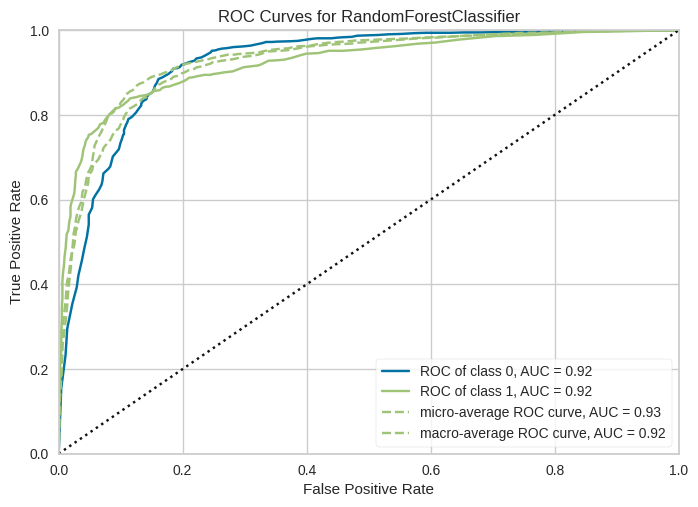

In [ ]:
plot_model(rf, plot="auc")

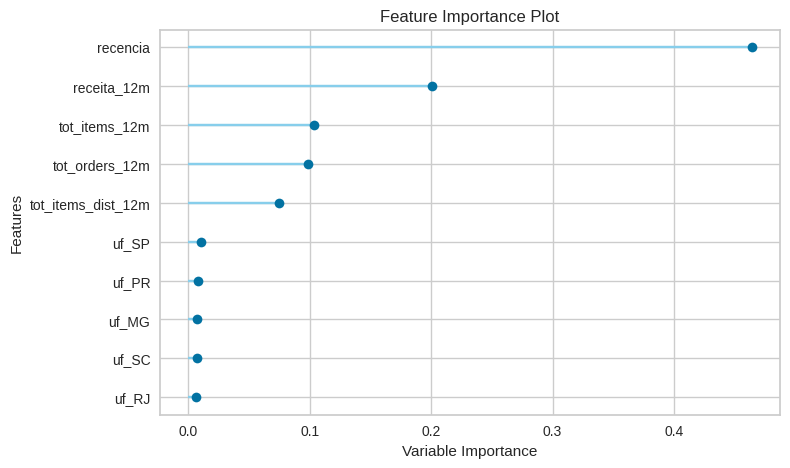

In [ ]:
plot_model(rf, plot="feature") #o shap trás informações mais relevantes

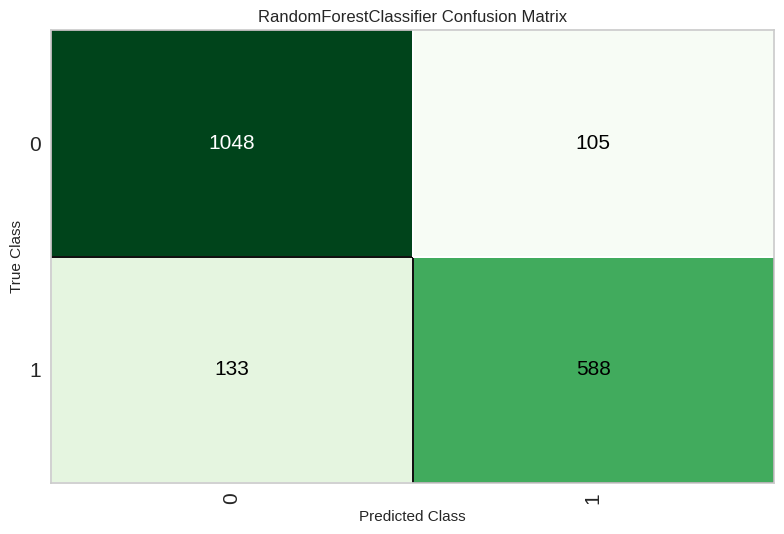

In [ ]:
plot_model(rf, plot="confusion_matrix")

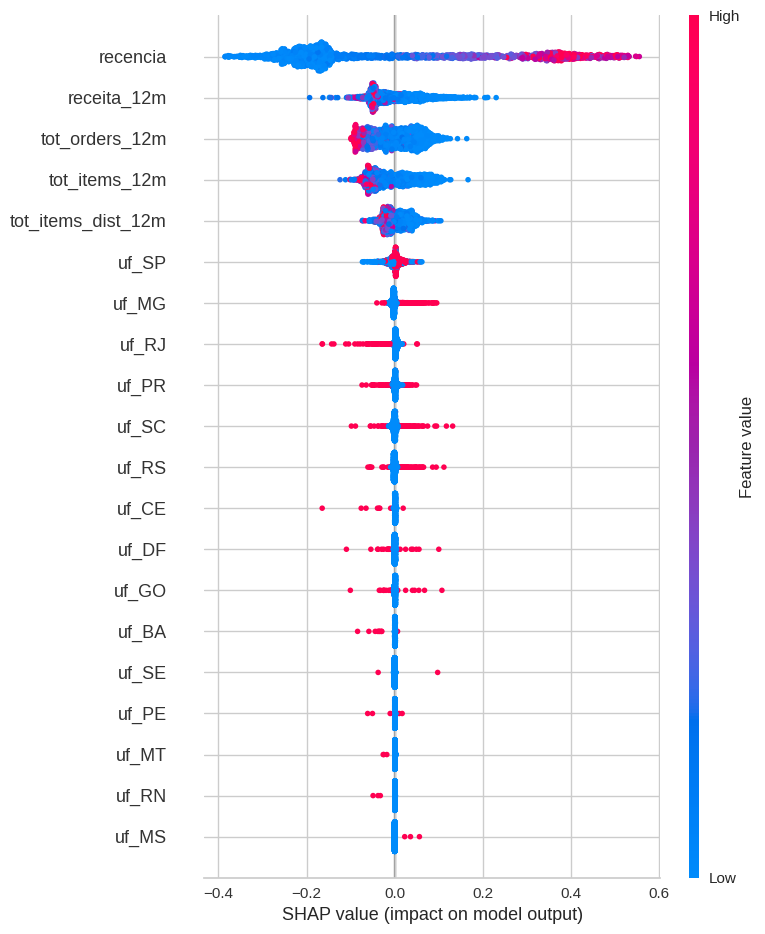

In [ ]:
interpret_model(rf)

In [ ]:
predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8730,0.9235,0.8155,0.8485,0.8317,0.7298,0.7301


,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,nao_revendeu_next_6m,prediction_label,prediction_score
3495,SP,3,3,1,2685.000000,133,1,1,0.78
3496,ES,178,209,9,21621.130859,8,0,0,1.00
3497,SP,44,48,20,1029.199951,4,0,0,0.94
3498,GO,1,1,1,120.000000,75,1,1,0.85
3499,SP,124,132,72,15104.919922,12,0,0,1.00
...,...,...,...,...,...,...,...,...,...
5364,MG,4,4,3,124.599998,12,1,0,0.72
5365,SP,5,5,5,385.589996,0,0,0,0.88
5366,PR,11,12,8,1450.199951,7,0,0,0.92
5367,SP,13,13,3,1709.869995,0,0,0,0.91


In [ ]:
rf_final = finalize_model(rf)

In [ ]:
save_model(rf_final,"/content/drive/MyDrive/BigData/rf09.11.23")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tot_orders_12m', 'tot_items_12m',
                                              'tot_items_dist_12m',
                                              'receita_12m', 'recencia'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('cate...
                  RandomForestClassifier(

#Estimativa

In [ ]:
(
    df_train
    .query("nao_revendeu_next_6m==1")
    .assign(comissao12m = lambda df : df['receita_12m']*0.10)
    .filter(["comissao12m"])
    .mean()
)

comissao12m    110.161276
dtype: float64

#Ticket médio é R$ 110,00

# R$ 20,00 voucher

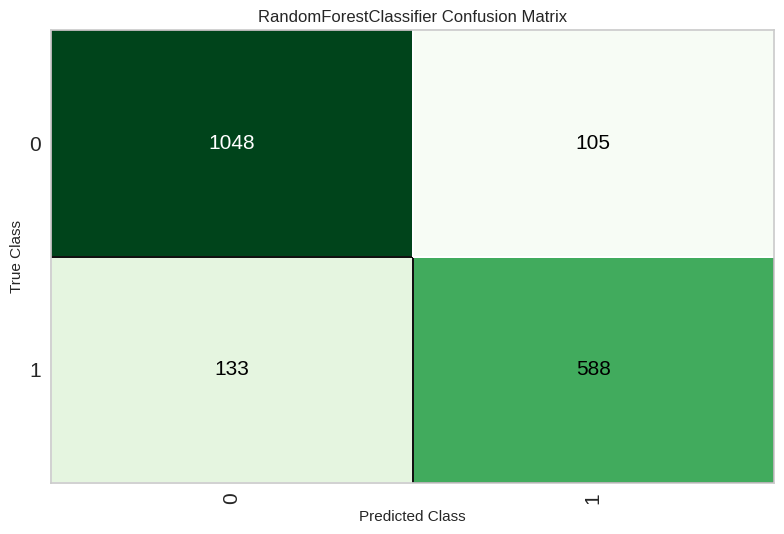

In [ ]:
plot_model(rf, plot="confusion_matrix")

133 + 588 = 721 é o total de não revenda
o modelo conseguiu capturar 588 que é igual 81,5% que é a chance que conseguimos reter

total = 721 é o total que iria perdir vezes * o ticket médio 110,00 = 79.310 que o valor que iria perder no mês
133* 110 = 14.640 é o valor que perdeu de pessoas que geraram churn

951.720,00 em 12 meses

economia bruta 79.310 - 14.640 = 64.688 (total bruto salvo)

valor do voucher (105 + 588) *20 = 13.860,00 (valor total de voucher - voucher são os 20 reais liberado para a empresa tentando reter o cliente, ou seja, trata se de uma despesa)

liquido = 64.688(economia bruta) - 13.860,00(custo do modelo) = 50.820,00

liquido = 50.820,00 * 12 meses = 609.840,00

sendo conservado - 609.840,00 * 40% = 243.936,00

#Ganhos acumulativos

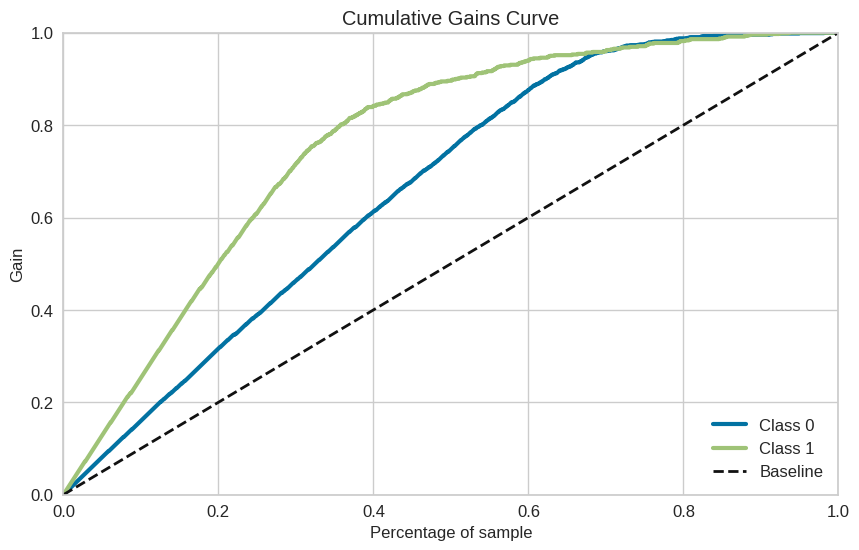

In [ ]:
plot_model(rf,plot="gain")

In [ ]:
df_oot['nao_revendeu_next_6m'].value_counts()

0    1153
1     721
Name: nao_revendeu_next_6m, dtype: int64

In [ ]:
import numpy as np

In [ ]:
(
    predict_model(rf, data=df_oot)
    .assign(score_label1 = lambda df: np.where(df["nao_revendeu_next_6m"]==1,df["prediction_score"],1-df["prediction_score"]))
    .sort_values(by="score_label1", ascending = False)
    .head(int(len(df_oot)*0.4))
    .filter(["nao_revendeu_next_6m"])
    .value_counts()
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8730,0.9235,0.8155,0.8485,0.8317,0.7298,0.7301


nao_revendeu_next_6m
1                       721
0                        28
dtype: int64

730*20 = 14.600 - custo do modelo em produção

79.310 valor sem modelo

79.310 - 14.600 = 64.710 * 12 = R\$ 776.520,00

 0 - 50% = não faz nada
 51% - 60% = manda uma mensagem email
 61% - 70% = da um voucher 10%
 71% - 100% = da um voucher de 20%

In [ ]:
(
    predict_model(rf, data=df_oot)
    .assign(score_label1 = lambda df: np.where(df["nao_revendeu_next_6m"]==1,df["prediction_score"],1-df["prediction_score"]))
    .sort_values(by="score_label1", ascending = False)
    .filter(["seller_id","score_label1"])
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8730,0.9235,0.8155,0.8485,0.8317,0.7298,0.7301


,seller_id,score_label1
4152,570d4583587a5fe2d47c7be89b91ad27,1.0
4540,8ccf3cf69651cc1d8a02c8bfaf3b8568,1.0
4695,a2b911e9ad40dc7d61c142a4683e2d85,1.0
5261,f307937c1bb287c3efc2a514b94b0d1d,1.0
4967,c8143b3069f6746a77421b5ce30a450c,1.0
...,...,...
4291,6c7d50c24b3ccd2fd83b44d8bb34e073,0.0
3658,15aac934c58d886785ac1b17953ea898,0.0
4162,582d4f8675b945722eda7c0cb61ba4c7,0.0
3655,1554a68530182680ad5c8b042c3ab563,0.0
